In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

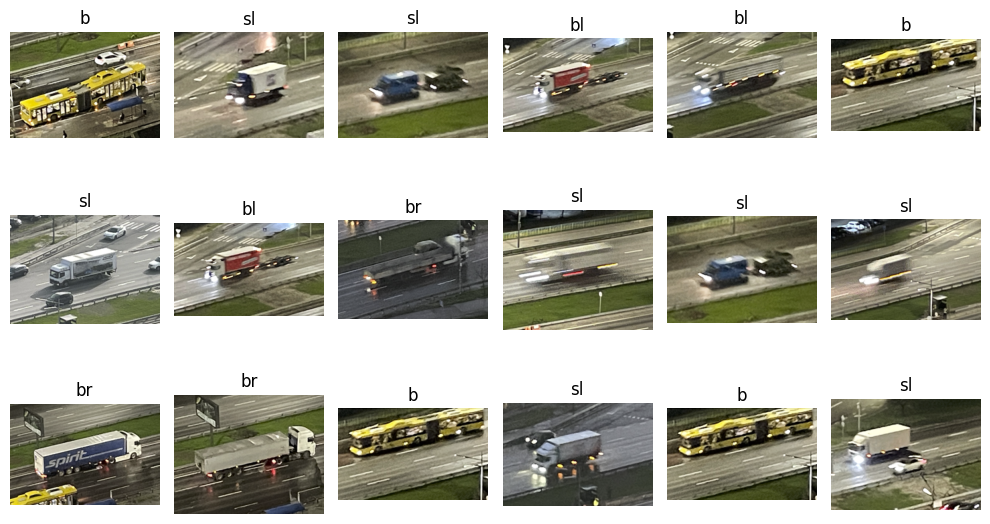

In [2]:
import os
import random
import matplotlib.pyplot as plt

# Подключение датасета
dataset_path = "/Users/mac/Documents/R_D/COM_VIS/Project/track/basetrack/Ad"

# Получение списка классов
classes = [class_name for class_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, class_name))]

# Кол-во классов
num_classes = len(classes)

# Случайные изображения
plt.figure(figsize=(10, 6))
for i in range(18):
    plt.subplot(3, 6, i+1)
    # Случайный класс
    random_class_name = random.choice(classes)
    # Список в классе
    images_in_class = os.listdir(os.path.join(dataset_path, random_class_name))
    # Вибор случайного изображения
    random_image_name = random.choice(images_in_class)
    random_image_path = os.path.join(dataset_path, random_class_name, random_image_name)
    # Загрузка изображения
    image = plt.imread(random_image_path)
    plt.imshow(image)
    plt.title(random_class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()



In [3]:
import numpy as np
import os

dataset_path = "/Users/mac/Documents/R_D/COM_VIS/Project/track/basetrack/Ad"

# Создание списка классов
classes = [class_name for class_name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, class_name))]

# Кол-во классов
num_classes = len(classes)

# Подсчет изображений для классов
class_histogram = np.zeros(num_classes, dtype=int)
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    class_images = os.listdir(class_path)
    class_histogram[i] = len(class_images)

# Гистограмма
for i in range(num_classes):
    print(f"Клас {i} ({classes[i]}): {class_histogram[i]} изображений")



Клас 0 (sl): 10 изображений
Клас 1 (bl): 34 изображений
Клас 2 (sr): 7 изображений
Клас 3 (br): 58 изображений
Клас 4 (b): 6 изображений


In [4]:
import numpy as np
import os

# Тестовые файлы
dataset_path = "/Users/mac/Documents/R_D/COM_VIS/Project/track/basetrack/Track"

# Список классов
classes = ["sl", "br", "b", "bl", "sr"]

# Кол-во классов
num_classes = len(classes)

# Кол-во изображений для классов
class_histogram = np.zeros(num_classes, dtype=int)
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    class_images = os.listdir(class_path)
    class_histogram[i] = len(class_images)

# Гистограмма для классов
for i in range(num_classes):
    print(f"Клас {i} ({classes[i]}): {class_histogram[i]} изображений")




Клас 0 (sl): 11 изображений
Клас 1 (br): 59 изображений
Клас 2 (b): 6 изображений
Клас 3 (bl): 34 изображений
Клас 4 (sr): 7 изображений


In [5]:
import numpy as np
import os

train_dataset_path = "/Users/mac/Documents/R_D/COM_VIS/Project/track/basetrack/Ad"
test_dataset_path = "/Users/mac/Documents/R_D/COM_VIS/Project/track/basetrack/Track"

# Список класов
classes = ["sl", "br", "b", "bl", "sr"]

# Кол-во классов
num_classes = len(classes)

# Изображения для тренировки и теста
train_class_histogram = np.zeros(num_classes, dtype=int)
for i, class_name in enumerate(classes):
    class_path = os.path.join(train_dataset_path, class_name)
    class_images = os.listdir(class_path)
    train_class_histogram[i] = len(class_images)

# Подсчет изображений
test_class_histogram = np.zeros(num_classes, dtype=int)
for i, class_name in enumerate(classes):
    class_path = os.path.join(test_dataset_path, class_name)
    class_images = os.listdir(class_path)
    test_class_histogram[i] = len(class_images)

# Гистограма
for i in range(num_classes):
    print(f"Клас {i} ({classes[i]}): {train_class_histogram[i]} изображений для тренировки, {test_class_histogram[i]} изображений для теста")


Клас 0 (sl): 10 изображений для тренировки, 11 изображений для теста
Клас 1 (br): 58 изображений для тренировки, 59 изображений для теста
Клас 2 (b): 6 изображений для тренировки, 6 изображений для теста
Клас 3 (bl): 34 изображений для тренировки, 34 изображений для теста
Клас 4 (sr): 7 изображений для тренировки, 7 изображений для теста


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the classifier
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Show the model summary
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,245 (477.52 KB)

 Trainable params: 122,245 (477.52 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Параметры для подготовки данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Создание генераторов даних для тренировки
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(32, 32),  
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dataset_path,
    target_size=(32, 32),  
    batch_size=32,
    class_mode='categorical'
)





Found 115 images belonging to 5 classes.
Found 115 images belonging to 5 classes.


In [8]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Тренировка модели
history = model.fit(train_generator, epochs=25, validation_data=test_generator)

Epoch 1/25


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5181 - loss: 1.4819 - val_accuracy: 0.5043 - val_loss: 1.3410
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms/step - accuracy: 0.5045 - loss: 1.3596 - val_accuracy: 0.5043 - val_loss: 1.2558
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 789ms/step - accuracy: 0.5068 - loss: 1.2360 - val_accuracy: 0.5043 - val_loss: 1.2354
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 787ms/step - accuracy: 0.4997 - loss: 1.2340 - val_accuracy: 0.5043 - val_loss: 1.2389
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 793ms/step - accuracy: 0.4715 - loss: 1.2227 - val_accuracy: 0.5130 - val_loss: 1.2137
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 785ms/step - accuracy: 0.5172 - loss: 1.1355 - val_accuracy: 0.5043 - val_loss: 1.1539
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 786ms/step - accuracy: 0.5469 - loss: 1.1408 - val_accuracy: 0.6609 - val_loss: 1.0707
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 797ms/step - accuracy: 0.6865 - loss: 1.0900 - val_accuracy: 0.5739 - val_loss: 1.0359
Epoch 

In [9]:
num_classes = 5  # Кол-во классов

# Определение модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])





/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Параметры генератора изображений
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset_path = "/Users/mac/Documents/R_D/COM_VIS/Project/track/basetrack/Ad"
test_dataset_path = "/Users/mac/Documents/R_D/COM_VIS/Project/track/basetrack/Track"

# Создание генераторов обучения
train_generator = train_datagen.flow_from_directory(
        train_dataset_path,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Тренировка модели
history = model.fit(train_generator, epochs=25, validation_data=test_generator)

# История обучения
h = history.history



Found 115 images belonging to 5 classes.
Found 115 images belonging to 5 classes.
Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3402 - loss: 1.5323 - val_accuracy: 0.5043 - val_loss: 1.2654
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 788ms/step - accuracy: 0.5215 - loss: 1.2695 - val_accuracy: 0.5304 - val_loss: 1.2277
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 790ms/step - accuracy: 0.6509 - loss: 1.2558 - val_accuracy: 0.5043 - val_loss: 1.2377
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 788ms/step - accuracy: 0.4870 - loss: 1.2881 - val_accuracy: 0.5043 - val_loss: 1.2003
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 785ms/step - accuracy: 0.4926 - loss: 1.2130 - val_accuracy: 0.5217 - val_loss: 1.1835
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 810ms/step - accuracy: 0.5205 - loss: 1.1933 - val_accuracy: 0.6174 - val_loss: 1.1478
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 787ms/step - accuracy: 0.6070 - loss: 1.1200 - val_accuracy: 0.5304 - val_loss: 1.1226
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [11]:
import numpy as np



In [12]:
import numpy as np

# Predict labels for the test set
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert true labels to sparse values
y_true = test_generator.classes


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step


In [13]:
# Классы
classes = {0:'slAd', 1:'brAd', 2:'bAd', 3:'blAd', 4:'srAd'}

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    # Filter true and predicted labels for the current class
    true_class_indices = np.where(y_true == class_id)[0]
    pred_class_indices = np.where(y_pred == class_id)[0]

    # Compute the intersection to find correct predictions
    correct_predictions = len(np.intersect1d(true_class_indices, pred_class_indices))
    total_samples = len(true_class_indices)

    # Compute accuracy
    acc = correct_predictions / total_samples if total_samples != 0 else 0

    # Print class name and accuracy
    print(f"{class_name}: {acc}")



slAd: 0.0
brAd: 0.3235294117647059
bAd: 0.5
blAd: 0.0
srAd: 0.14285714285714285


In [14]:
# Evaluate the model on the test set
ev = model.evaluate(test_generator)

print('Test loss:   ', ev[0])
print('Test accuracy:', ev[1])



4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 577ms/step - accuracy: 0.9889 - loss: 0.0731
Test loss:    0.08164380490779877
Test accuracy: 0.9826086759567261


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Конфигурация для генератора данных
batch_size = 32
image_size = (32, 32)  

# Создание генератора для обучения
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Подготовка данных для обучения
train_generator = train_datagen.flow_from_directory(
        train_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')




Found 115 images belonging to 5 classes.
Found 115 images belonging to 5 classes.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 562ms/step


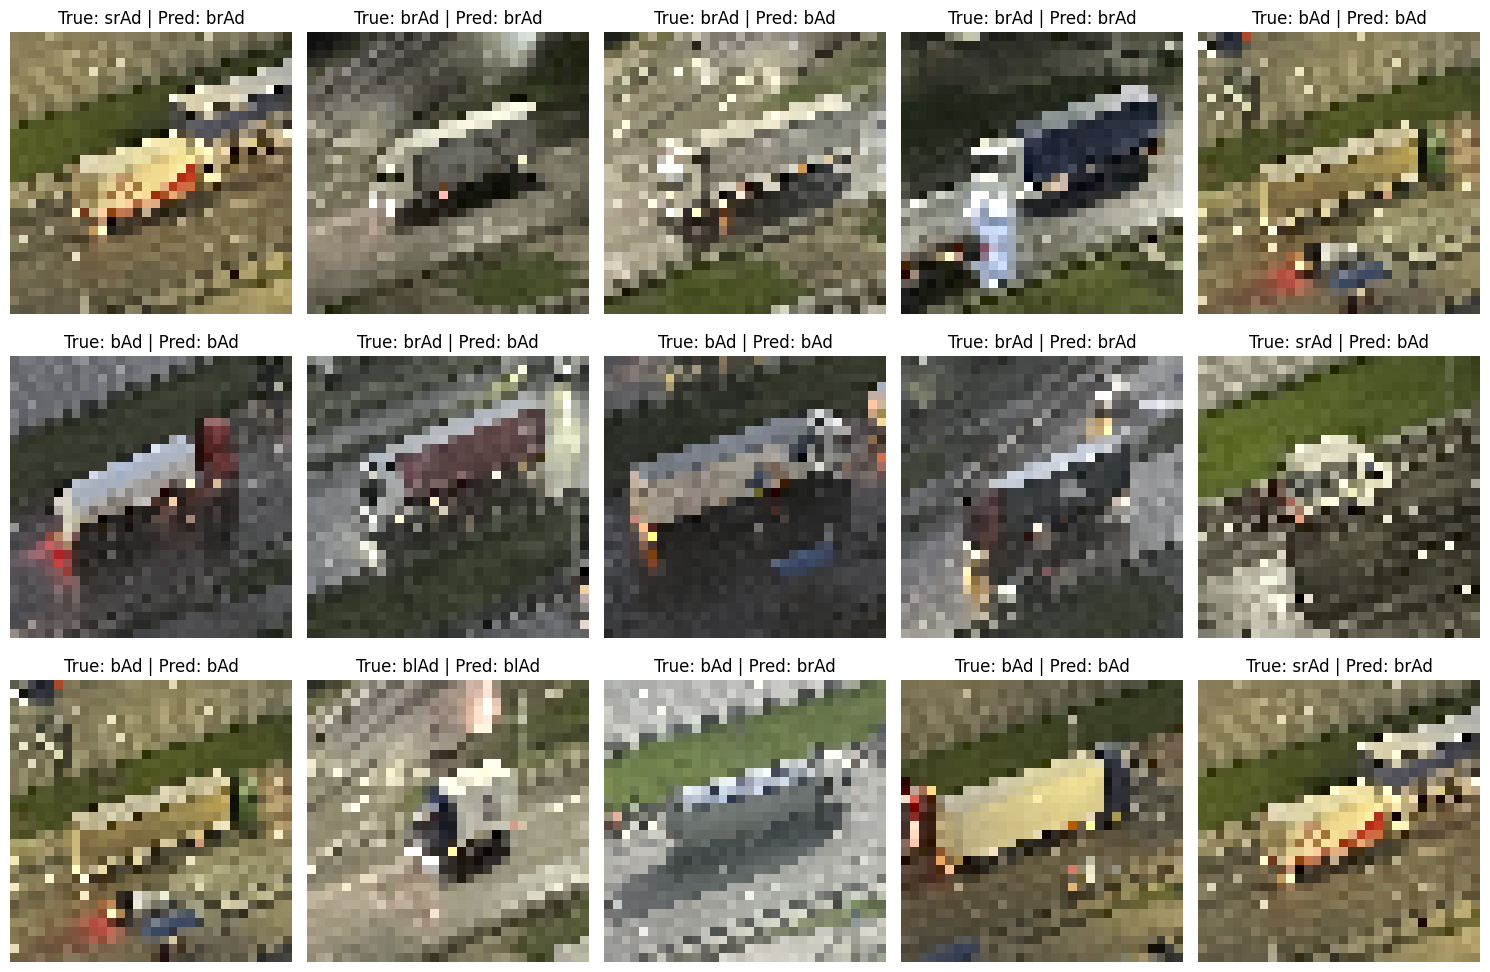

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Predict labels for the test set
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Show random samples
plt.figure(figsize=(15, 10))
for ii in range(15):
    # Retrieve a random batch of images and labels from the test generator
    batch_x, batch_y = next(test_generator)
    # Pick a random sample index from the batch
    idx = np.random.randint(0, batch_x.shape[0])
    # Show the results
    plt.subplot(3, 5, ii+1)
    plt.imshow(batch_x[idx])
    true_class = np.argmax(batch_y[idx])  # Get the index of the true class
    pred_class = y_pred[idx]  # Get the predicted class
    plt.title(f'True: {classes[true_class]} | Pred: {classes[pred_class]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



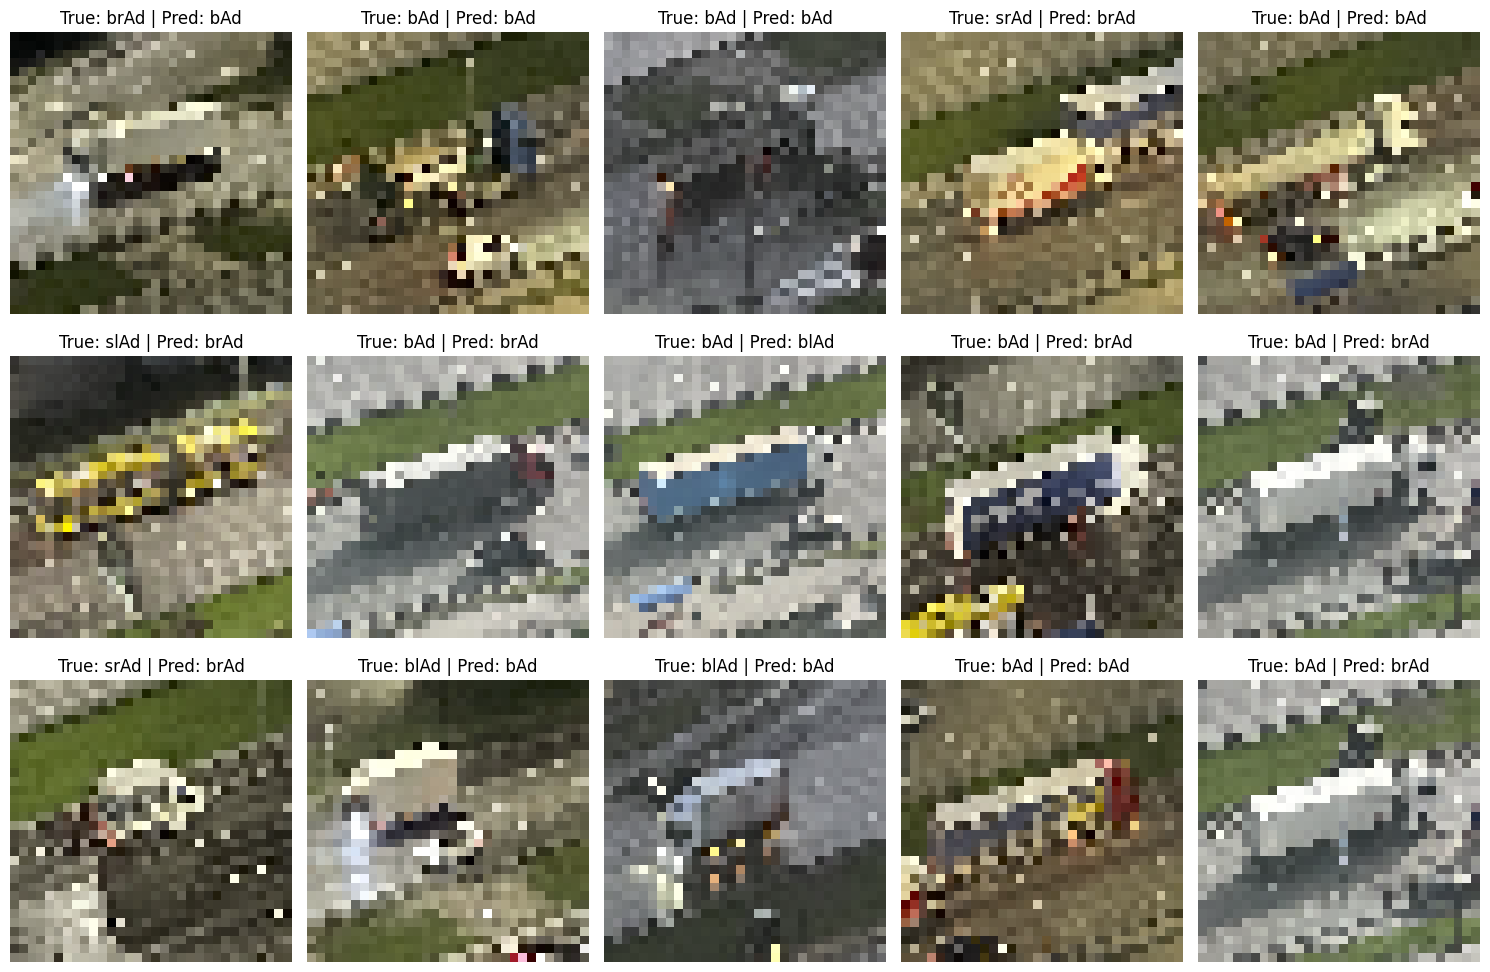

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Show random samples
plt.figure(figsize=(15, 10))
for ii in range(15):
    # Retrieve a random batch of images and labels from the test generator
    batch_x, batch_y = next(test_generator)
    # Pick a random sample index from the batch
    idx = np.random.randint(0, batch_x.shape[0])
    # Show the results
    plt.subplot(3, 5, ii+1)
    plt.imshow(batch_x[idx])
    true_class = np.argmax(batch_y[idx])  # Get the index of the true class
    pred_class = y_pred[idx]  # Get the predicted class
    plt.title('True: ' + str(classes[true_class]) + ' | Pred: ' + str(classes[pred_class]))
    plt.axis('off')

plt.tight_layout()
plt.show()
